In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py
% matplotlib inline

In [2]:
lines = []
with open('../data1/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    filename = line[0].split('/')[-1]
    current_path = '../data1/IMG/' + filename
    image = mpimg.imread(current_path)
    images.append(image)
    measurement = float(line[3]) # line[3] type is str
    measurements.append(measurement)
    
# keras require numpy format
X_train = np.array(images)
y_train = np.array(measurements)
print(X_train.shape)
print(y_train.shape)

(2478, 160, 320, 3)
(2478,)


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Lambda
from keras.layers import Cropping2D
from keras.layers import Dropout

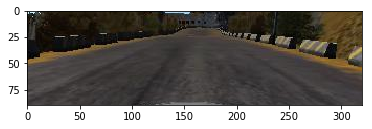

In [4]:
image = images[2400].copy()
crop_image = image[50:,:]
crop_image = crop_image[:90,:]
plt.imshow(crop_image)

## Flip the image

0.0


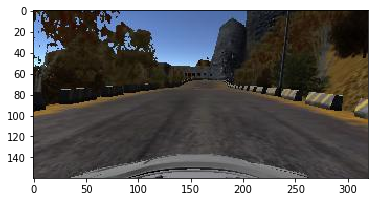

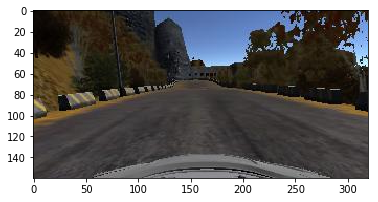

In [5]:
image_flipped = np.fliplr(images[2400])
plt.figure()
plt.imshow(images[2400])
plt.figure()
plt.imshow(image_flipped)
print(y_train[2400])

## Using Multiple Cameras 

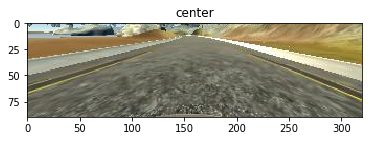

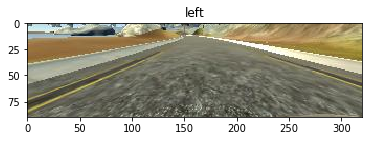

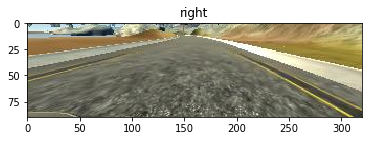

In [6]:
line = lines[200]
images = []
for i in range(3):
    filename = line[i].split('/')[-1]
    path =  '../data1/IMG/' + filename
    image = mpimg.imread(path)
    crop_image = image[50:140,:]
    images.append(crop_image)

plt.figure()
plt.title('center')
plt.imshow(images[0])


plt.figure()
plt.title('left')
plt.imshow(images[1])

plt.figure()
plt.title('right')
plt.imshow(images[2])

In [7]:
car_images = []
steering_angles = []
for line in lines:
    images = []
    for i in range(3):
        filename = line[i].split('/')[-1]
        path =  '../data1/IMG/' + filename
        image = mpimg.imread(path)
        images.append(image)
        
        steering_center = float(line[3])
       
        
    correction = 0.15
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    car_images.extend(images)
    steering_angles.extend([steering_center, steering_left, steering_right])

X_train = np.array(car_images)
y_train = np.array(steering_angles)
print(X_train.shape)

(7434, 160, 320, 3)


## The Final Model

In [15]:
model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x:(x/255.0) - 0.5))
model.add(Convolution2D(24,(5,5),strides=(2,2),activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(36,(5,5),strides=(2,2),activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(48,(5,5),strides=(2,2),activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=7)
model.save('model.h5')

Train on 5947 samples, validate on 1487 samples
Epoch 1/7
5947/5947 [==============================] - 5s - loss: 0.0323 - val_loss: 0.0400
Epoch 2/7
5947/5947 [==============================] - 5s - loss: 0.0190 - val_loss: 0.0328
Epoch 3/7
5947/5947 [==============================] - 5s - loss: 0.0178 - val_loss: 0.0355
Epoch 4/7
5947/5947 [==============================] - 5s - loss: 0.0174 - val_loss: 0.0347
Epoch 5/7
5947/5947 [==============================] - 5s - loss: 0.0166 - val_loss: 0.0334
Epoch 6/7
5947/5947 [==============================] - 5s - loss: 0.0165 - val_loss: 0.0317
Epoch 7/7
5947/5947 [==============================] - 5s - loss: 0.0161 - val_loss: 0.0293
